Epoch 1/100
340/340 [==============================] - 5s 15ms/step - loss: 0.0794
Epoch 2/100
340/340 [==============================] - 2s 7ms/step - loss: 0.0316
Epoch 3/100
340/340 [==============================] - 2s 6ms/step - loss: 0.0241
Epoch 4/100
340/340 [==============================] - 2s 7ms/step - loss: 0.0194
Epoch 5/100
340/340 [==============================] - 2s 7ms/step - loss: 0.0163
Epoch 6/100
340/340 [==============================] - 2s 7ms/step - loss: 0.0166
Epoch 7/100
340/340 [==============================] - ETA: 0s - loss: 0.015 - 2s 7ms/step - loss: 0.0154
Epoch 8/100
340/340 [==============================] - 2s 7ms/step - loss: 0.0153
Epoch 9/100
340/340 [==============================] - 2s 6ms/step - loss: 0.0122
Epoch 10/100
340/340 [==============================] - 2s 6ms/step - loss: 0.0141
Epoch 11/100
340/340 [==============================] - 2s 7ms/step - loss: 0.0122
Epoch 12/100
340/340 [==============================] - 2s 7ms/step - l

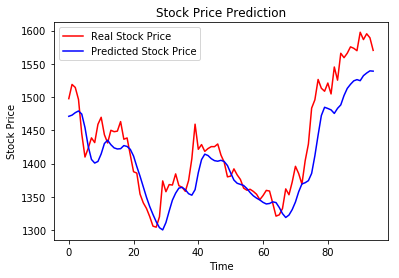

In [3]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

# replace these values according to the needs of the model
train_length = 400
test_length = 95  # test_length = total entries - train_length
epoch = 100
timestep = 60
file_path = "ASIANPAINTALLN.csv"

# Importing the data set
dataset_train = pd.read_csv(file_path)
training_set = dataset_train.iloc[0:train_length, 8:9].values

sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []
y_train = []
for i in range(timestep, train_length):
    X_train.append(training_set_scaled[i-timestep:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Building the RNN
regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer='adam', loss='mean_squared_error')

regressor.fit(X_train, y_train, epochs=epoch, batch_size=32)

# Making the predictions and visualising the results

dataset_test = pd.read_csv(file_path)
real_stock_price = dataset_test.iloc[train_length:(train_length+test_length), 8:9].values

dataset_total = dataset_train['Close Price']
inputs = dataset_total[len(dataset_total) - len(real_stock_price) - timestep:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(timestep, (timestep+test_length)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
